In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


C:\Users\lysla\AppData\Local\Temp\ipykernel_14060\3508948378.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Load dataset
file_path = 'BAN6025Project2Data.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df['X27'] = df['X27'].replace('x11','windows')
if 'ID' in df.columns:
    df = df.drop(['ID'], axis=1)

# Identify target variable
target_variable = 'Target_Y'

# Handle missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables to dummies
X = df.drop([target_variable], axis=1)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype='float')

# Define target variable
y = df[target_variable]

# Check class distribution
print("Original class distribution:\n", y.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio as needed
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled class distribution:\n", y_resampled.value_counts())

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)


Original class distribution:
 Target_Y
0    988971
1     11029
Name: count, dtype: int64
Resampled class distribution:
 Target_Y
0    988971
1    494485
Name: count, dtype: int64


In [3]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=10)

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")


'decision_tree_default.pdf'

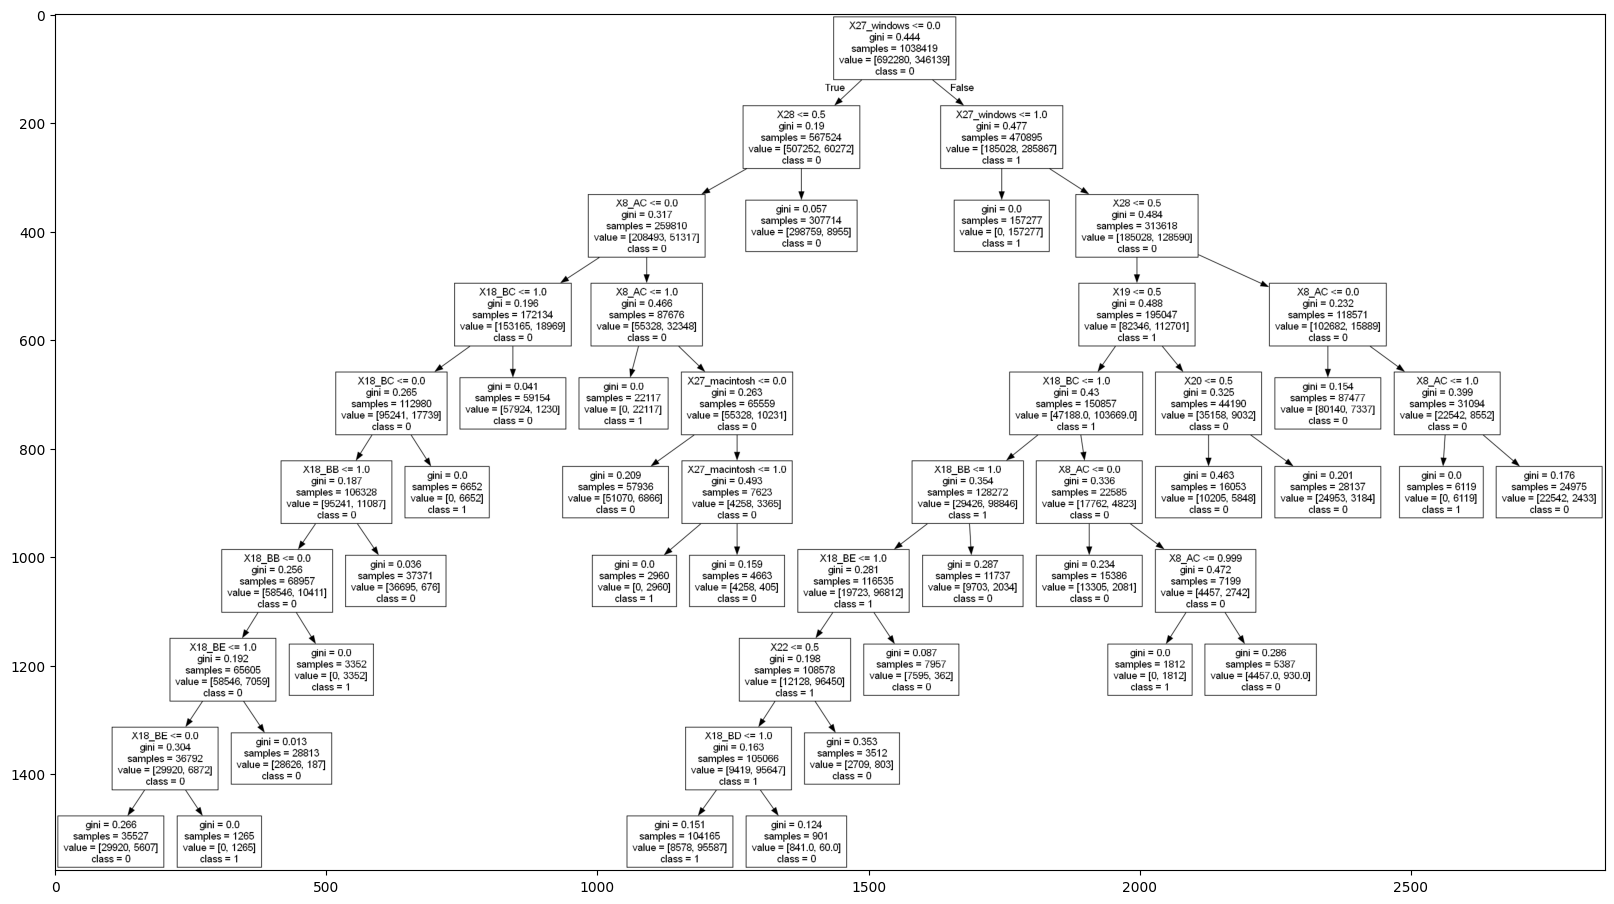

In [5]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)
plt.show()

In [6]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

In [7]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9446
Precision: 0.9719
Recall.  : 0.8584

 -- test set -- 
Accuracy : 0.9440
Precision: 0.9714
Recall.  : 0.8574


In [8]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[683702  48998]
 [  8578 297141]]
[[292941  21155]
 [  3750 127191]]


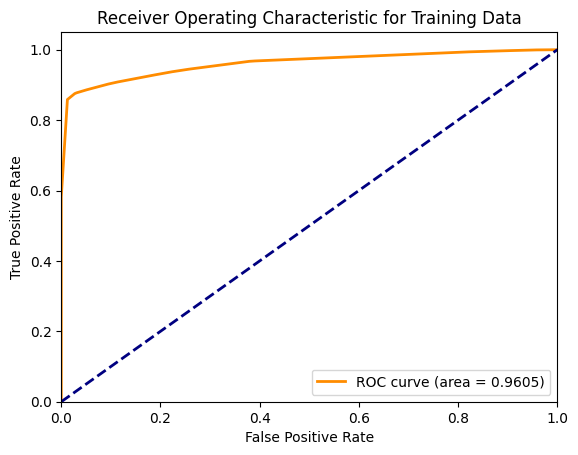

In [9]:

# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train[:, 1])  # Ensure y_train is numeric
roc_auc = roc_auc_score(y_train, y_prob_train[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


    importance        feature
45    0.560415    X27_windows
27    0.120568          X8_AC
22    0.102740            X28
37    0.064917         X18_BC
15    0.044197            X19
36    0.042031         X18_BB
39    0.036933         X18_BE
43    0.012272  X27_macintosh
18    0.008761            X22
38    0.003589         X18_BD
16    0.003576            X20
2     0.000000             X3
0     0.000000             X1
1     0.000000             X2
13    0.000000            X16
12    0.000000            X14
11    0.000000            X13
10    0.000000            X12
9     0.000000            X11
8     0.000000            X10
7     0.000000             X9
6     0.000000             X7
5     0.000000             X6
4     0.000000             X5
3     0.000000             X4
20    0.000000            X24
21    0.000000            X26
19    0.000000            X23
17    0.000000            X21
14    0.000000            X17
29    0.000000          X8_AE
28    0.000000          X8_AD
26    0.00

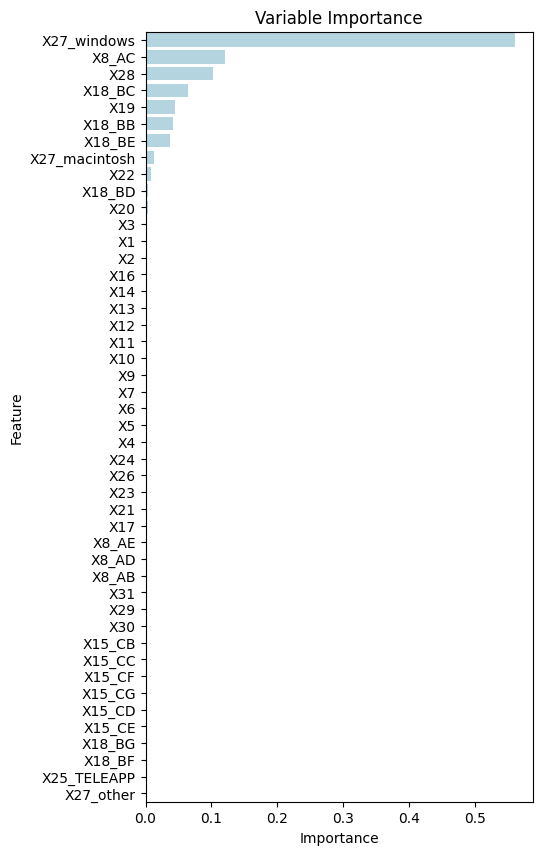

In [10]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

RANDOM FOREST

In [12]:
rf = RandomForestClassifier(n_estimators=150, max_features=6, max_depth=None, min_samples_leaf=1, random_state=904)

# fit the model to the training data
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [17]:
# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

In [18]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 1.0000
Precision: 1.0000
Recall.  : 1.0000

 -- test set -- 
Accuracy : 0.9918
Precision: 0.9969
Recall.  : 0.9786


GRADIENT BOOSTING

In [13]:
# create an instance of the Gradient Boosting Classifier using default values

gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=3, random_state=904)


# fit the model to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=904)

In [14]:
# make predictions on the training and test data
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

y_prob_train_gb = gb.predict_proba(X_train)
y_prob_test_gb = gb.predict_proba(X_test)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy, precision, recall, and F1-score for the training set
acc_train = accuracy_score(y_train, y_pred_train_gb)
prec_train = precision_score(y_train, y_pred_train_gb)
rec_train = recall_score(y_train, y_pred_train_gb)
f1_train = f1_score(y_train, y_pred_train_gb)

# Print the training set scores
print(" -- Train Set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall   : {:.4f}".format(rec_train))
print("F1-score : {:.4f}".format(f1_train))
print("")

# Calculate the accuracy, precision, recall, and F1-score for the test set
acc_test = accuracy_score(y_test, y_pred_test_gb)
prec_test = precision_score(y_test, y_pred_test_gb)
rec_test = recall_score(y_test, y_pred_test_gb)
f1_test = f1_score(y_test, y_pred_test_gb)

# Print the test set scores
print(" -- Test Set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall   : {:.4f}".format(rec_test))
print("F1-score : {:.4f}".format(f1_test))


 -- Train Set -- 
Accuracy : 0.9826
Precision: 0.9868
Recall   : 0.9606
F1-score : 0.9735

 -- Test Set -- 
Accuracy : 0.9823
Precision: 0.9869
Recall   : 0.9597
F1-score : 0.9731


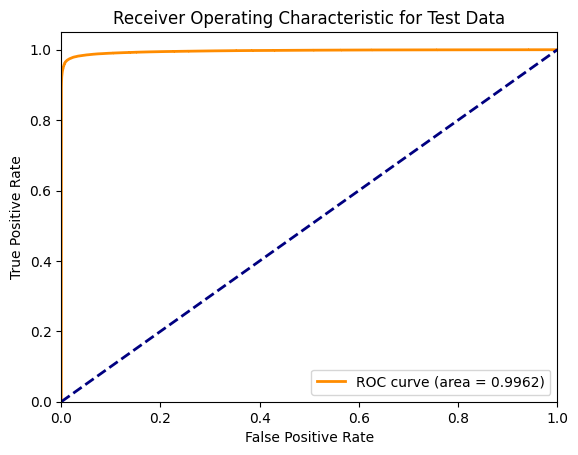

In [17]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_gb[:,1])
roc_auc = roc_auc_score(y_test, y_prob_test_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()
